## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 8 #

In questa esercitazione è stato studiato il ground state di una singola particella quantistica 1D, sotto l'effetto del potenziale esterno seguente:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Poiché non è possibile risolvere analiticamente questo problema, per trovare la funzione d'onda del ground state è stato usato un metodo variazionale Montecarlo. Data una funzione di prova, dipendente da diversi parametri, il metodo va a trovare i valori migliori di tali parametri secondo un determinato criterio, in questo caso abbassare il più possibile il valore di $\langle {\hat H} \rangle_T$ per avvicinarsi il più possibile al ground state. In questo caso la funzione di prova era del tipo:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Questa rappresenta la sovrapposizione di due gaussiane. E' una rappresentazione legittima visto che il potenziale è caratterizzato da due buche simmetriche rispetto all'origine.

### esercizio 8.1

In questa prima parte dell'esercitazione è stato implementato il codice per poter stimare il valore di $\langle {\hat H} \rangle_T$ a parametri $\sigma$ e $\mu$ fissati con relativa deviazione standard con il metodo dei blocchi. 

Per fare questo è stato usato l'algoritmo di Metropolis, campionando il modulo quadro $|\Psi_T(x)|^2$ della funzione d'onda di prova con una probabilità di transizione $T(x_{new}|x_{old})$ uniforme. 

Successivamente è stata utilizzata tale distribuzione per stimare $\langle {\hat H} \rangle_T$ definito come:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Nel corso di tutta la simulazione abbiamo fissato Use $\hbar = 1$ and $m=1$.

Come parametri per il data blocking invece sono stati utilizzati: 100 blocchi da 1000 step ciascuno.
Di seguito riportiamo i risultati ottenuti fissando i valori dei parametri a $\sigma = 0.5$ e $\mu = 1.0$ (scelti in modo casuale).
Dopo vari tentativi il delta per il passo del Metropolis è stato posto a $1.2$ per un tasso di accettazione circa del $0.5$

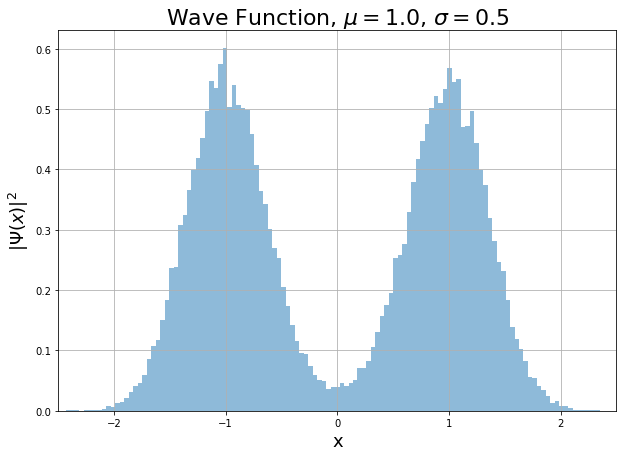

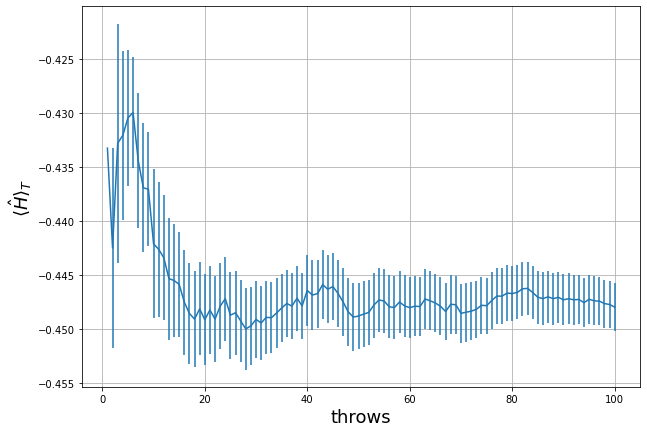

In [58]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.figure(figsize=(10, 7))
x = np.loadtxt("positions.out")
bins = np.linspace(-4, 4, 200)
plt.hist(x, bins, alpha=0.5, density=True, label='N=1')
plt.xlabel('x', fontsize=18)
plt.xlim(-2.5,2.5)
plt.ylabel('$|\Psi(x)|^2$', fontsize=18)
plt.title('Wave Function, $\mu = $'+str(1.0)+', $\sigma = $'+str(0.5), fontsize=22)
plt.grid(True)

plt.show()

import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.figure(figsize=(10, 7))

x,f, error = np.loadtxt("output_Ham_SA.out", usecols=(0,2,3), delimiter='\t', unpack='true')
plt.errorbar(x,f  ,yerr=error)
plt.xlabel('throws' , fontsize=18)
plt.ylabel(r'$\langle {\hatH} \rangle_T$', fontsize=18)
plt.grid(True)
plt.show()


### esercizio 8.2

Nel secondo esercizio è stato utilizzato il Simulated Annealing per ottimizzare i parametri $\sigma$ e $\mu$ e poi solo successivamente è stato utilizzato il metodo del data blocking dell' $esercizio$ $8.1$.


Di seguito è riportato l'andamento di $\langle {\hat H} \rangle_T$ in funzione della temperatura del Simulated Annealing.

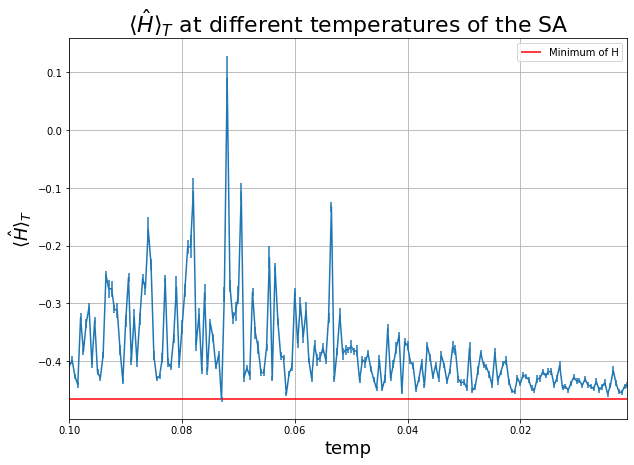

In [59]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.figure(figsize=(10, 7))
#x,f = np.loadtxt("data/H_temp.out", usecols=(0,3), delimiter='\t', unpack='true')
#plt.plot(x,f)
#plt.xlim( max(x) , min(x) )
x,f, error = np.loadtxt("H_temp.out", usecols=(0,3,4), delimiter='\t', unpack='true')
plt.errorbar(x,f  ,yerr=error)
plt.xlim( max(x) , min(x) )
plt.hlines(min(f) ,max(x), min(x) , color = "red" , label = "Minimum of H" )
plt.xlabel('temp' , fontsize=18)
plt.ylabel(r'$\langle {\hatH} \rangle_T$', fontsize=18)
plt.title(r"$\langle {\hatH} \rangle_T$ at different temperatures of the SA", fontsize=22)
plt.grid(True)
plt.legend()
plt.show()


Si può notare come per temperature più alte vengano accettati parametri che non per forza minimizzano $\langle {\hat H} \rangle_T$, mentre al diminuire della temperatura il sistema inizia ad accettare sempre meno liberamente i parametri proposti e la selettività diventa maggiore.

Di seguito è riportato un grafico che mostra i valori esplorati per i parametri da ottimizzare, con il rispettivo valore di $\langle {\hat H} \rangle_T$ che si ricava con essi.
Il colore dei punti del grafico è legato al valore dell'energia.

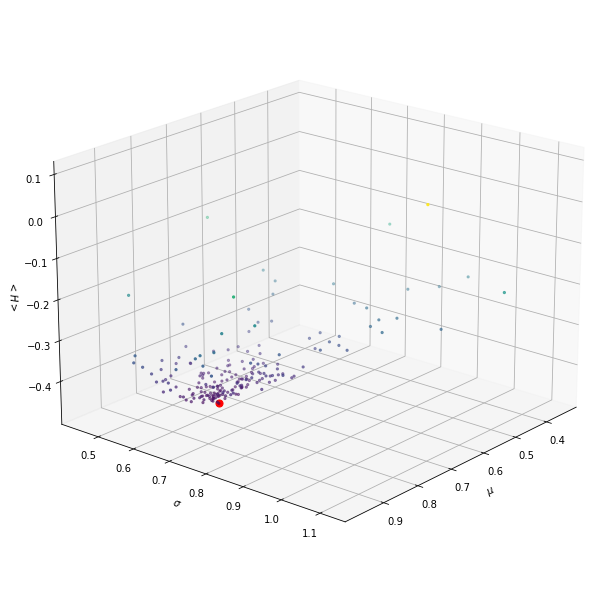

best variational parameters:  mu = 0.797356014  sigma = 0.629624408


In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (15, 8))
temp, mu, sigma, H = np.loadtxt("H_temp.out", usecols=(0,1,2,3), unpack = True)
ax = Axes3D(fig , auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(mu, sigma, H, c=H, marker='.')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$<H>$')
ax.view_init(20, 40)
min_mu    = mu[np.argsort(H)[0]]
min_sigma = sigma[np.argsort(H)[0]]
min_H = H[np.argsort(H)[0]]
ax.scatter(min_mu, min_sigma, min_H, s=50, color='red', marker='o')
plt.show()

print("best variational parameters:  mu =",min_mu , " sigma =",min_sigma )

In questo grafico non traspare l'ordine con cui vengono esplorati i valori, ma la sua utilità è nel rendere ben visibile la presenza di un minimo per quanto riguarda l'energia in funzione di $\sigma$ e $\mu$. Inoltre si può notare come il SA si concentri nella zona in prossimità del punto di minimo.

Questo risulta ancora più chiaro nel grafico sottostante, il quale mostra invece la cronologia del SA.

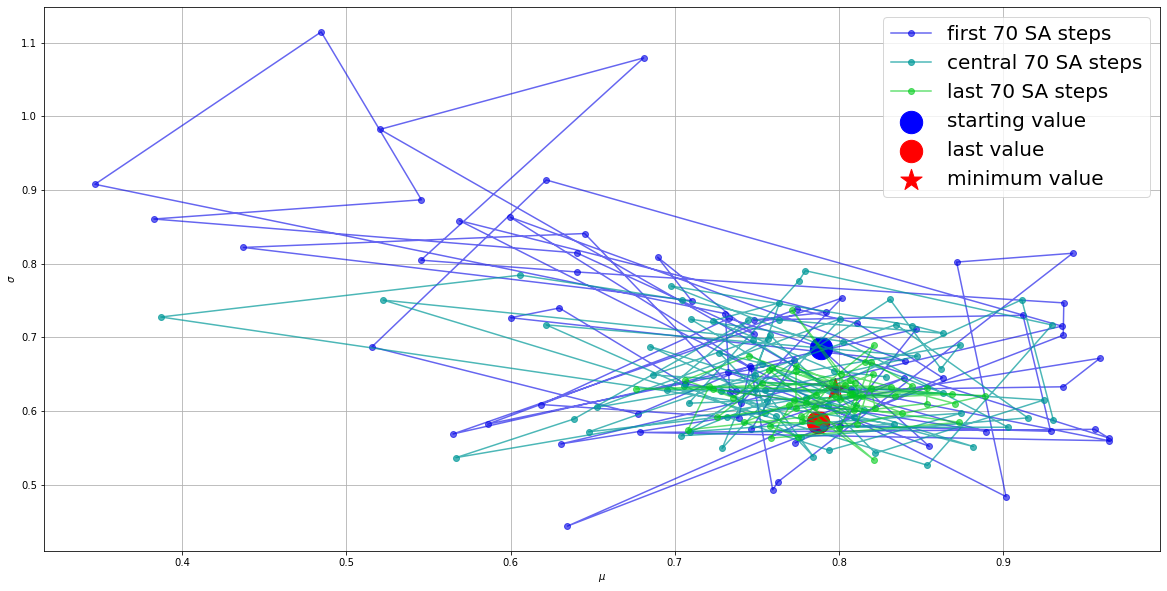

In [61]:
temp,mu, sigma, H = np.loadtxt("H_temp.out", usecols=(0,1,2,3), unpack = True)
fig = plt.figure( figsize = (20,10) )
#plt.scatter(mu,sigma , "-.", c=H, marker="o", label = "from blu to red")
plt.plot(mu[:70],sigma[:70] ,"-o", color = (0,0,0.9),alpha=0.6, label="first 70 SA steps")
plt.plot(mu[70:140],sigma[70:140], "-o",color = (0,0.6,0.6),alpha=0.7, label="central 70 SA steps")
plt.plot(mu[140:],sigma[140:] , "-o",color = (0,0.8,0.1),alpha=0.6, label="last 70 SA steps")
min_mu    = mu[np.argsort(H)[0]]
min_sigma = sigma[np.argsort(H)[0]]
plt.scatter(mu[0] , sigma [0] ,s=500, color = 'blue',marker= "o",label = "starting value")
plt.scatter(mu[-1] , sigma [-1],s=500 , color = 'red',marker= "o", label = "last value")
plt.scatter(min_mu,min_sigma,s=500, color = 'red' ,marker= "*",label = "minimum value")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

Risulta ben visibile come il Simulated Annealing a temperature alte accetti parametri con una elevata dispersione attorno ai valori di partenza, mentre nei successivi 70 step i parametri risultino abbastanza cirscoscritti seppure comunque con una certa dispersione mentre per le ultime temperature, quelle più basse, i valori risultino molto concentrati in prossimità del valore minimo dell'energia

Dopo aver ottimizzato i due parametri è stata effettuata la stima dell'energia media con il codice sviluppato nel primo esercizio (8.1). Di seguito due grafici, il campionamento di $|\Psi(x)|^2$ effettuato con i valori ottimizzati e l'andamento della stima del valor medio dell'energia in funzione del numero di blocchi

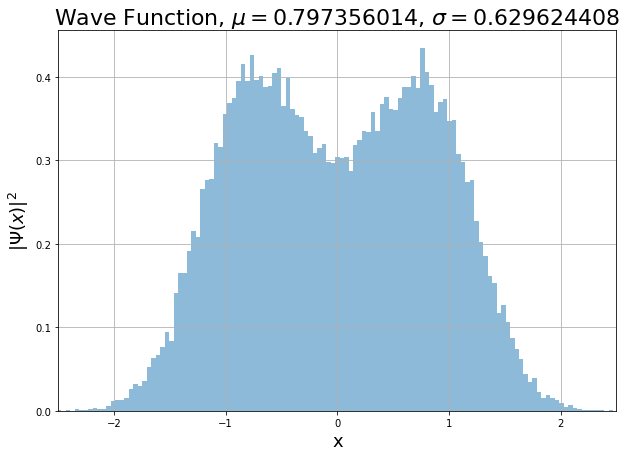

In [62]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.figure(figsize=(10, 7))
x = np.loadtxt("positions_SA.out")
bins = np.linspace(-4, 4, 200)
plt.hist(x, bins, alpha=0.5, density=True, label='N=1')
#x = np.loadtxt("data/positions_SA.out")
#bins = np.linspace(-4, 4, 200)
#plt.hist(x, bins, alpha=0.5, density=True, label='N=1')
plt.xlabel('x', fontsize=18)
plt.xlim(-2.5,2.5)
plt.ylabel('$|\Psi(x)|^2$', fontsize=18)
plt.title('Wave Function, $\mu = $'+str(min_mu)+', $\sigma = $'+str(min_sigma), fontsize=22)
plt.grid(True)


plt.show()

Risultato finale : 
-0.44797691
Errore statistico : 
0.00219773043


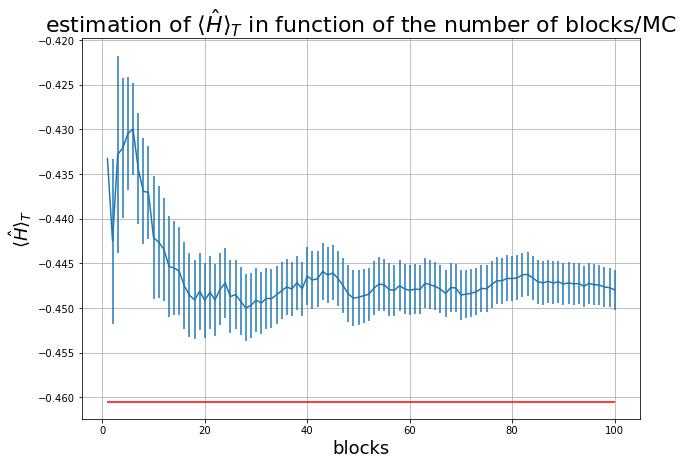

In [63]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.figure(figsize=(10, 7))

x,f, error = np.loadtxt("output_Ham_SA.out", usecols=(0,2,3), delimiter='\t', unpack='true')
plt.errorbar(x,f  ,yerr=error)
print('Risultato finale : ')
print(f[-1])
print('Errore statistico : ')
print(error[-1])
plt.xlabel('blocks' , fontsize=18)
plt.ylabel(r'$\langle {\hatH} \rangle_T$', fontsize=18)
plt.title(r"estimation of $\langle {\hatH} \rangle_T$ in function of the number of blocks/MC", fontsize=22)
plt.grid(True)
plt.hlines(-0.46046587969271546,max(x), min(x) , color = "red" , label = "Minimum of H" )
plt.show()


E' interessante notare come il valore stimato di $\langle {\hat H} \rangle_T$ converga ad un valore che non risulta però statisticamente compatibile con il valore ottenuto trasformando l'equazione di Schrodinger in un'equazione matriciale e questo era prevedibile, in quanto è stata assunta come funzione d'onda del ground state la $
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$ che risulta una buona funzione di prova visto il potenziale ma non la migliore.

In ultimo viene riportato un grafico che mostra a confronto il potenziale a cui è soggetta la particella quantistica 1D, la funzione d'onda di prova in forma analitica, un istogramma che rappresenta il suo campionamento (riportato anche nel grafico due grafici prima) e il risultato ottenuto tramite la trasformazione dell'equazione di Schrodinger in un'equazione matriciale

Ground state energy:  -0.46046587969271546
1st excited state energy:  0.09742471331761013
2nd excited state energy:  1.9717331343930202


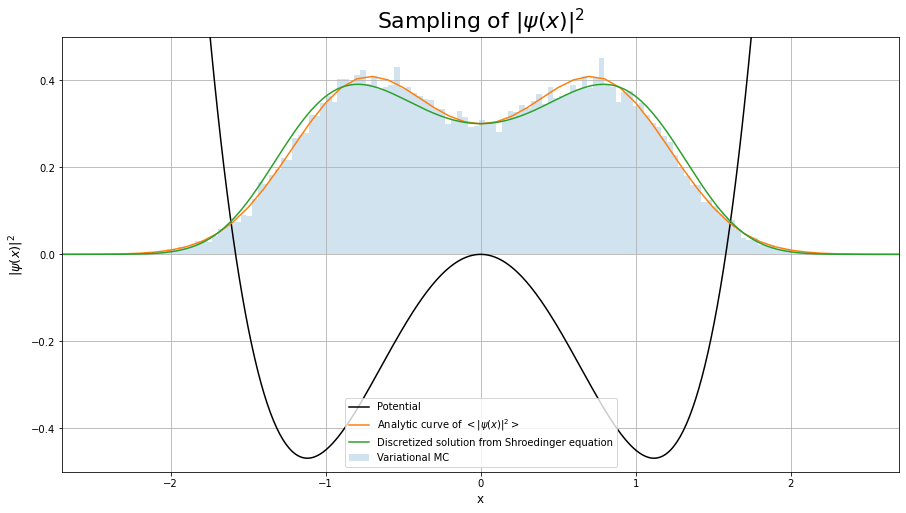

In [64]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things

fig = plt.figure(figsize = (15,8))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
#plt.plot(x,(psi[0])**2)
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities: Sampling of $|\psi(x)|^2 $")
psi_h = np.loadtxt("positions_SA.out", unpack = 'true')
z = np.arange(-3,3 , step = 0.1)

def psi2_an(x, mu , sigma):
    a = (x-mu)/sigma
    b = (x+mu)/sigma
    norm = 2*np.sqrt(np.pi) *sigma*(1 + np.exp(-(mu/sigma)**2)) 
    return (np.exp(-0.5*( a**2) ) + np.exp(-0.5* b**2))**2 /norm

plt.hist(psi_h, 150, density = 'true' , alpha = 0.2, label = "Variational MC ")
plt.plot(z,psi2_an(z,min_mu,min_sigma) , label = "Analytic curve of $< |\psi(x)|^2 >$")
plt.plot(x,(psi[0])**2, label = "Discretized solution from Shroedinger equation")
plt.ylim( -0.5, 0.5)
plt.xlim(-2.7,2.7)
plt.grid(True)
plt.xlabel("x", size = 12)
plt.title("Sampling of $|\psi(x)|^2 $", size = 22)
plt.ylabel("$|\psi(x)|^2 $" , size = 13)
plt.legend()
plt.show()